#attribute 'Age' { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 }
#attribute 'Delivery number' { 1,2,3,4 }
#attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
#attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
#attribute 'Heart Problem' { 1,0 } -> {0 = apt, 1 = inept }
#attribute Caesarian { 0,1 } -> {0 = No, 1 = Yes }

In [14]:
#read data (arff format)
library("foreign")
rawdata=read.arff("./caesarian.csv.arff")
colnames(rawdata) = c('Age', 'DelN', 'DelT', 'BP', 'HP', "CS")
str(rawdata)

'data.frame':	80 obs. of  6 variables:
 $ Age : Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DelN: Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DelT: Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP  : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS  : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


In [62]:
#make blind testdata
testdata=rawdata[,-6]
head(testdata)
str(testdata)

Age,DelN,DelT,BP,HP
22,1,0,2,0
26,2,0,1,0
26,2,1,1,0
28,1,0,2,0
22,2,0,1,0
26,1,1,0,0


'data.frame':	80 obs. of  5 variables:
 $ Age : Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DelN: Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DelT: Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP  : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


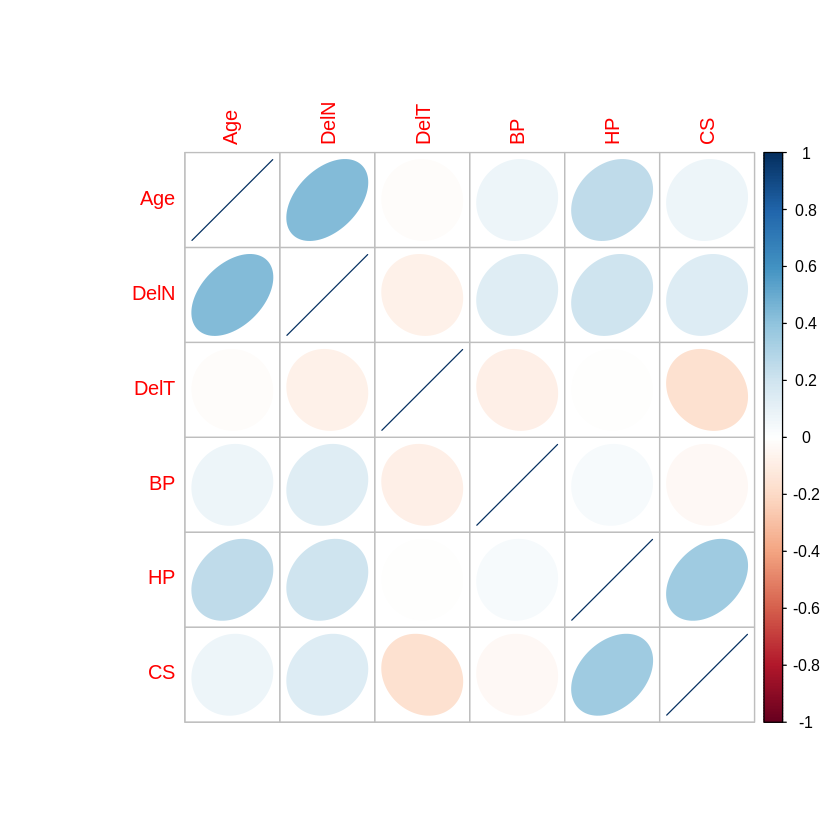

In [21]:
## draw corr plot from data converted to numeric 
library('corrplot')
numdata=rawdata
numdata$Age = as.numeric(rawdata$Age)
numdata$DelN = as.numeric(rawdata$DelN)
numdata$DelT = as.numeric(rawdata$DelT)
numdata$BP = as.numeric(rawdata$BP)
numdata$HP = as.numeric(rawdata$HP)
numdata$CS = as.numeric(rawdata$CS)
test.cor = cor(numdata)
corrplot(test.cor, method='ellipse')

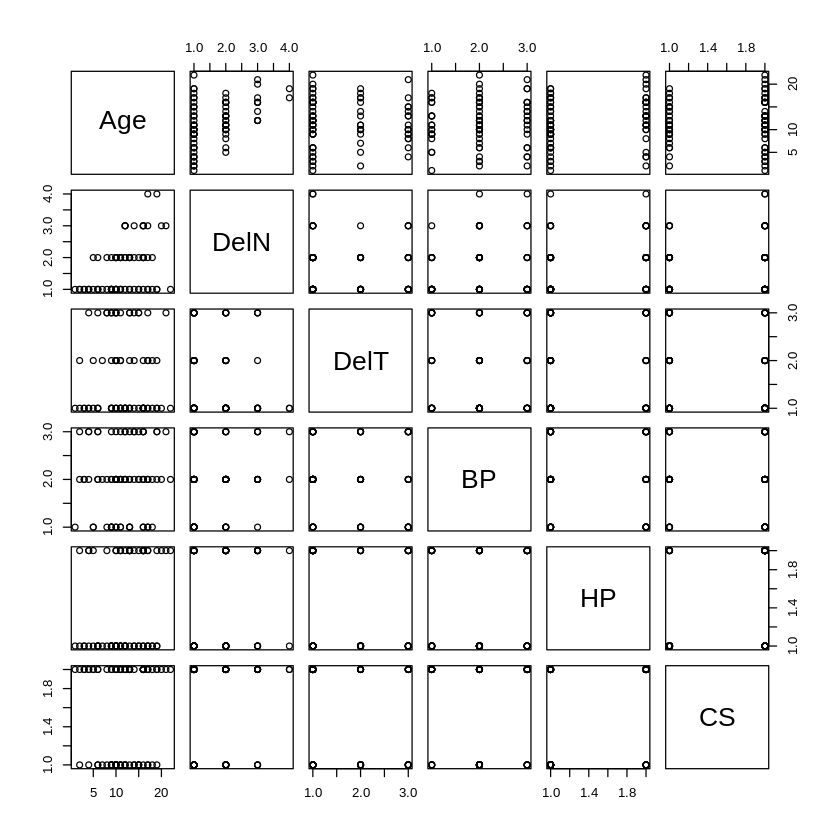

In [22]:
pairs(~., data=rawdata)

In [27]:
## multi-var linear reg.
test.lr = lm(CS ~., data=numdata)
summary(test.lr)


Call:
lm(formula = CS ~ ., data = numdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9176 -0.4219  0.1192  0.4173  0.7420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.31671    0.26246   5.017  3.5e-06 ***
Age         -0.00589    0.01244  -0.473  0.63741    
DelN         0.06096    0.07511   0.812  0.41965    
DelT        -0.10064    0.06529  -1.541  0.12750    
BP          -0.05033    0.07526  -0.669  0.50576    
HP           0.35679    0.11282   3.162  0.00227 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4702 on 74 degrees of freedom
Multiple R-squared:  0.1632,	Adjusted R-squared:  0.1067 
F-statistic: 2.886 on 5 and 74 DF,  p-value: 0.01954


In [31]:
#best subset reg.
library(leaps)
test.sub = regsubsets(CS ~., data=numdata)
test.sub_sum = summary(test.sub)
test.sub_sum

Subset selection object
Call: regsubsets.formula(CS ~ ., data = numdata)
5 Variables  (and intercept)
     Forced in Forced out
Age      FALSE      FALSE
DelN     FALSE      FALSE
DelT     FALSE      FALSE
BP       FALSE      FALSE
HP       FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         Age DelN DelT BP  HP 
1  ( 1 ) " " " "  " "  " " "*"
2  ( 1 ) " " " "  "*"  " " "*"
3  ( 1 ) " " "*"  "*"  " " "*"
4  ( 1 ) " " "*"  "*"  "*" "*"
5  ( 1 ) "*" "*"  "*"  "*" "*"

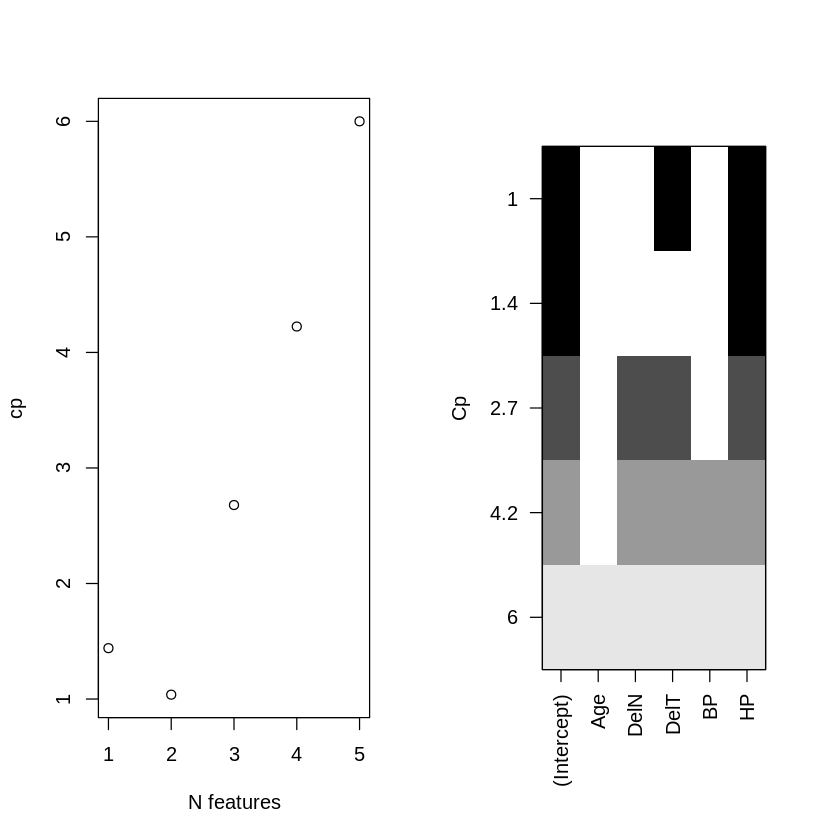

In [32]:
## Mallow's Cp
par(mfrow=c(1,2))
plot(test.sub_sum$cp, xlab='N features', ylab='cp')
plot(test.sub, scale='Cp')

In [33]:
#Bayesian Information Criterion
which.min(test.sub_sum$bic)
#Adjusted R-squared
which.max(test.sub_sum$adjr2)

[1] 1

[1] 2

In [34]:
# linear reg. again using best feature subset feture selected by lowest Cp combination
test.sub_best = lm(CS ~ DelT + HP, data=numdata)
summary(test.sub_best)


Call:
lm(formula = CS ~ DelT + HP, data = numdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8637 -0.4038  0.1363  0.4956  0.6968 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.24565    0.18854   6.607 4.57e-09 ***
DelT        -0.10060    0.06407  -1.570  0.12048    
HP           0.35933    0.10719   3.352  0.00125 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4642 on 77 degrees of freedom
Multiple R-squared:  0.1515,	Adjusted R-squared:  0.1294 
F-statistic: 6.872 on 2 and 77 DF,  p-value: 0.001794


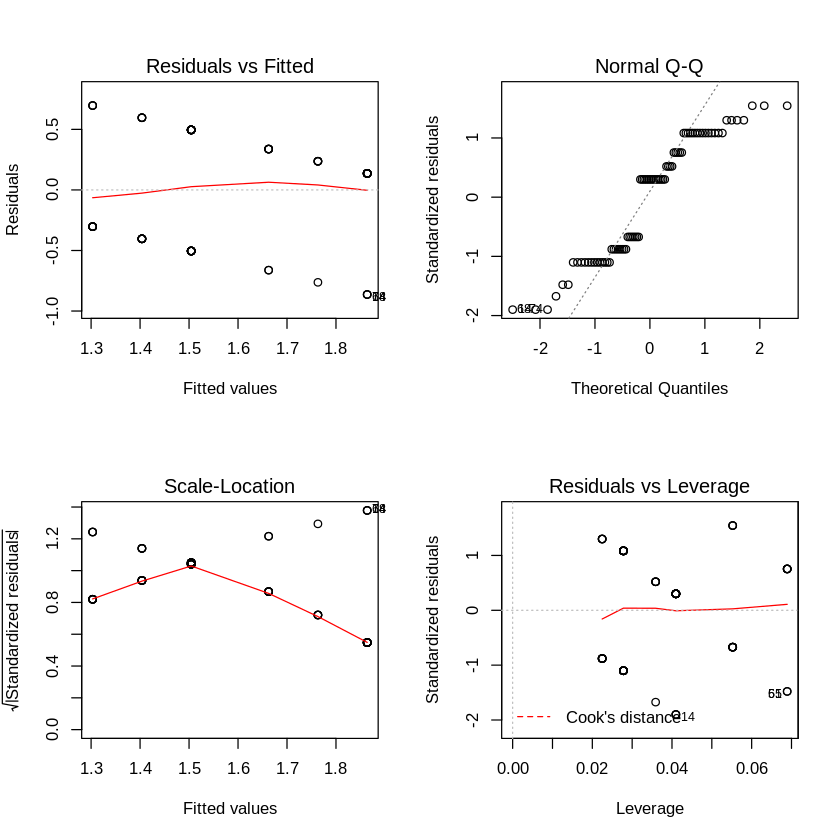

In [35]:
par(mfrow=c(2,2))
plot(test.sub_best)

In [37]:
# Variance Inflation Factor (VIF) , vif vif=1 no collinearity
library(car)
vif(test.sub_best)

Loading required package: carData


DelT       HP 
1.000016 1.000016

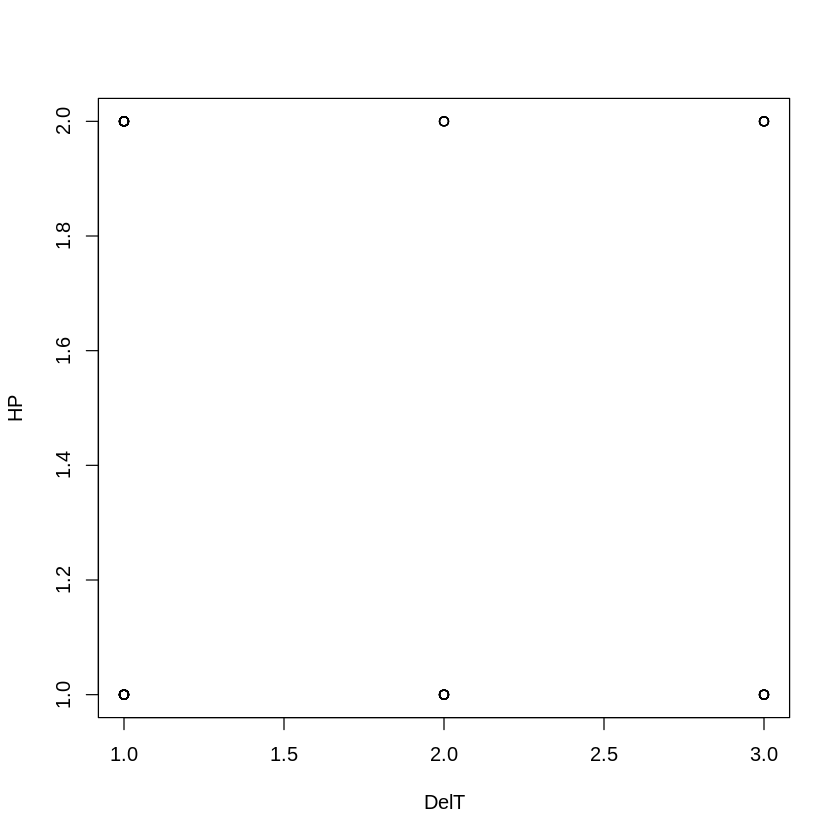

In [38]:
with(numdata, plot(DelT, HP, xlab='DelT', ylab='HP'))

In [41]:
# Breusch-Pagan (BP)
library(lmtest)
bptest(test.sub_best)


Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  test.sub_best
BP = 3.9575, df = 2, p-value = 0.1382


In [53]:
finaldata=numdata
finaldata['CS0'] = as.numeric(rawdata$CS)
finaldata['CS_mvlr'] = predict(test.lr)
finaldata['CS_subbest'] = predict(test.sub_best)
head(finaldata)
str(finaldata)

Age,DelN,DelT,BP,HP,CS,CS0,CS_mvlr,CS_subbest
6,1,1,3,1,1,1,1.447484,1.504382
10,2,1,2,1,2,2,1.535212,1.504382
10,2,2,2,1,1,1,1.434575,1.403785
12,1,1,3,1,1,1,1.412144,1.504382
6,2,1,2,1,2,2,1.558772,1.504382
10,1,2,1,1,1,1,1.423945,1.403785


'data.frame':	80 obs. of  9 variables:
 $ Age       : num  6 10 10 12 6 10 11 16 12 11 ...
 $ DelN      : num  1 2 2 1 2 1 2 3 2 1 ...
 $ DelT      : num  1 1 2 1 1 2 1 1 1 2 ...
 $ BP        : num  3 2 2 3 2 1 2 2 2 2 ...
 $ HP        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ CS        : num  1 2 1 1 2 1 1 2 1 2 ...
 $ CS0       : num  1 2 1 1 2 1 1 2 1 2 ...
 $ CS_mvlr   : num  1.45 1.54 1.43 1.41 1.56 ...
 $ CS_subbest: num  1.5 1.5 1.4 1.5 1.5 ...


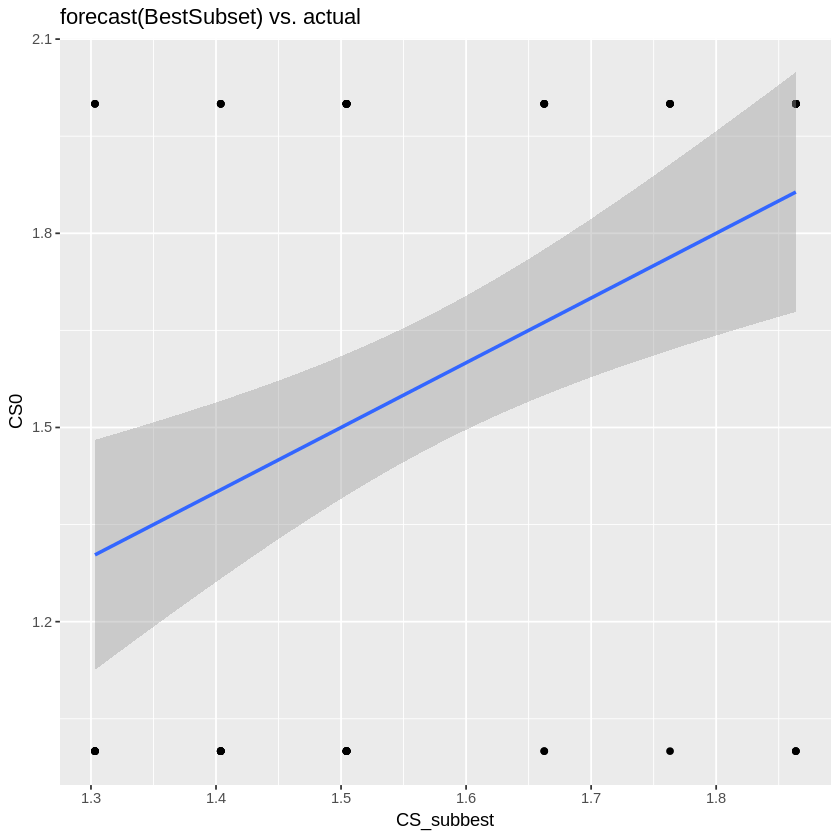

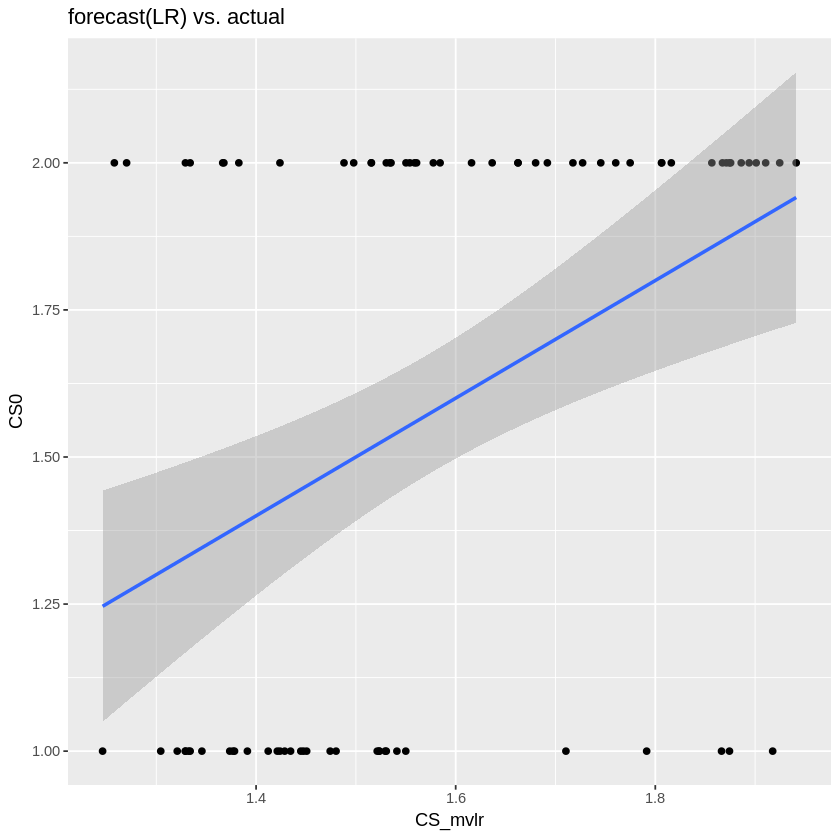

In [56]:
library(ggplot2)
ggplot(finaldata, aes(x= CS_subbest, y=CS0)) + geom_point() + geom_smooth(method=lm) + labs(title='forecast(BestSubset) vs. actual')
ggplot(finaldata, aes(x= CS_mvlr, y=CS0)) + geom_point() + geom_smooth(method=lm) + labs(title='forecast(LR) vs. actual')

In [59]:
#cross validation 
library(MPV)

## press : cross validation among 4set
#Hat Matrix
PRESS(test.lr)
PRESS(test.sub_best)
#LOOCV = cal(hat)
PRESS.lr = sum((resid(test.lr)/(1-hatvalues(test.lr)))^2)
PRESS.sub_best = sum((resid(test.sub_best)/(1-hatvalues(test.sub_best)))^2)
PRESS.lr
PRESS.sub_best

[1] 18.98737

[1] 17.87705

[1] 18.98737

[1] 17.87705